# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

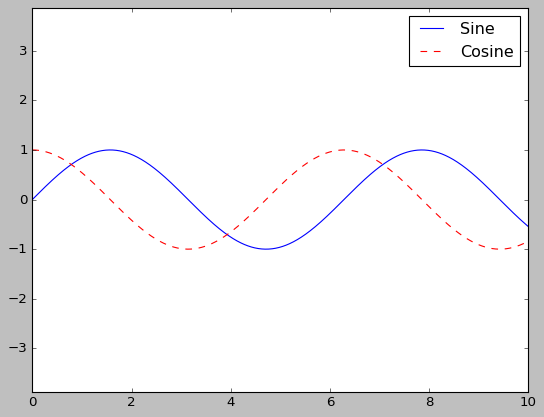

In [3]:
x = np.linspace(0,10,1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label = 'Sine')
ax.plot(x, np.cos(x), '--r', label = "Cosine")
ax.axis('equal') # misma escala en x y
ax.legend();

But there are many ways we might want to customize such a legend.
For example, we can specify the location and turn off the frame:

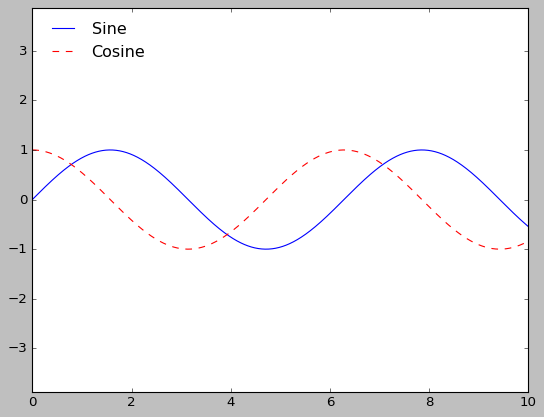

In [4]:
ax.legend(loc = 'upper left', frameon = False)
fig

We can use the ``ncol`` command to specify the number of columns in the legend:

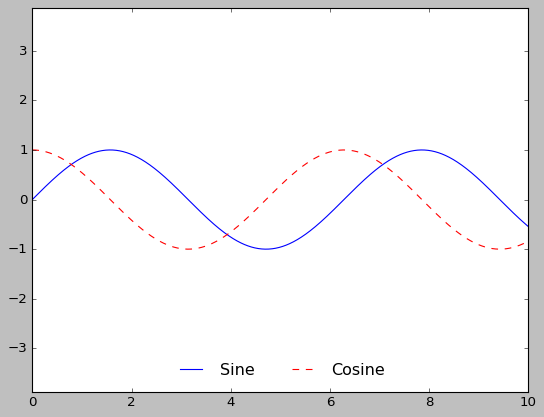

In [5]:
ax.legend(loc = "lower center", frameon = False, ncol = 2)
fig

We can use a rounded box (``fancybox``) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text:

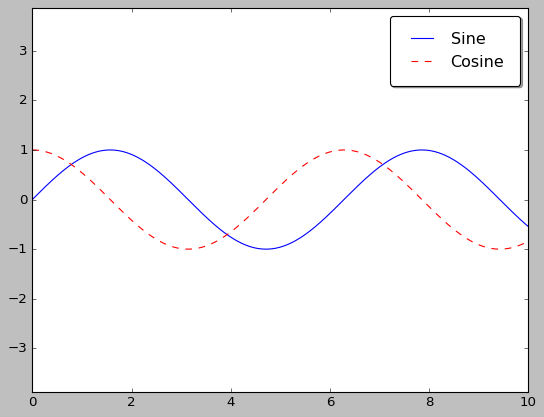

In [6]:
ax.legend(fancybox = True, framealpha=1, shadow=True, borderpad = 1)
fig

For more information on available legend options, see the ``plt.legend`` docstring.

## Choosing Elements for the Legend

As we have already seen, the legend includes all labeled elements by default.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.
The ``plt.plot()`` command is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to ``plt.legend()`` will tell it which to identify, along with the labels we'd like to specify:

In [7]:
x.shape

(1000,)

In [8]:
x[:, np.newaxis].shape

(1000, 1)

In [9]:
x[np.newaxis, :].shape

(1, 1000)

In [10]:
#y.shape

In [11]:
np.pi * np.arange(0, 2, 0.5)

array([0.        , 1.57079633, 3.14159265, 4.71238898])

In [12]:
(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5)).shape

(1000, 4)

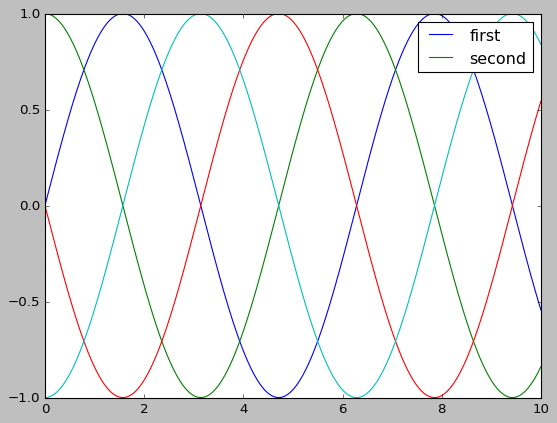

In [13]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend:

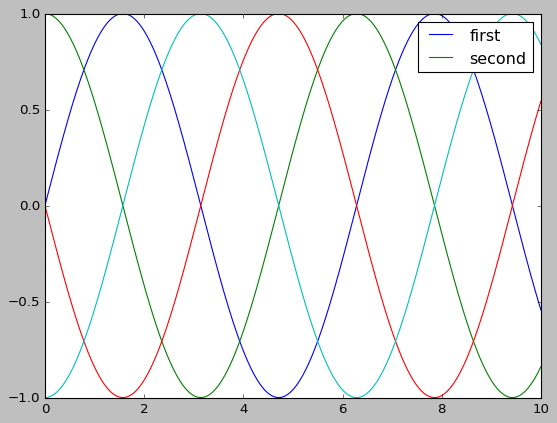

In [14]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Notice that by default, the legend ignores all elements without a ``label`` attribute set.

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.
We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

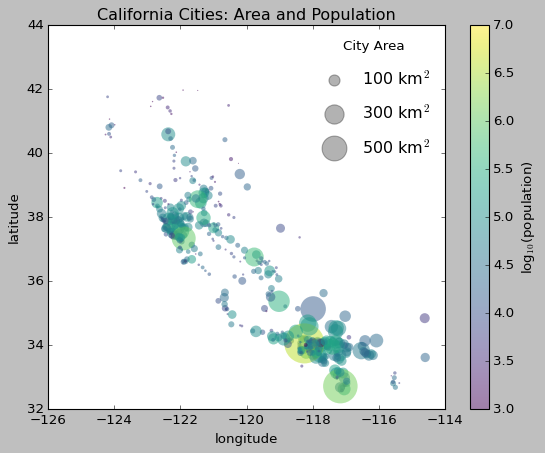

In [15]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)

plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so **we fake them by plotting empty lists.**
Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.
**This strategy can be useful for creating more sophisticated visualizations.**

Finally, note that for **geographic data like this, it would be clearer if we could show state boundaries** or other map-specific elements.
For this, an excellent choice of tool is Matplotlib's Basemap addon toolkit, which we'll explore in Geographic Data with Basemap.

## Multiple Legends

Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard ``legend`` interface, it is only possible to create a single legend for the entire plot.
**If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one.**
We can work around this by creating a new legend artist from scratch, and then using the lower-level ``ax.add_artist()`` method to manually add the second artist to the plot:

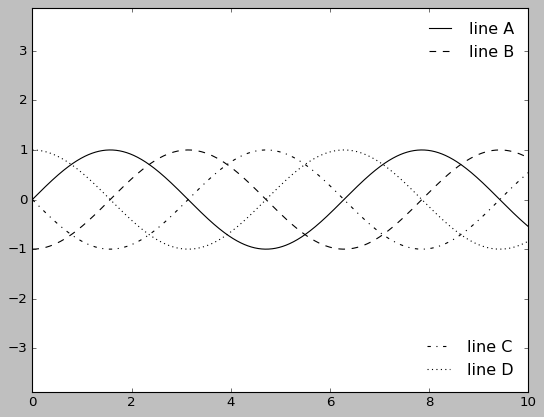

In [16]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

This is a peek into the low-level artist objects that comprise any Matplotlib plot.
If you examine the source code of ``ax.legend()`` (recall that you can do this with within the IPython notebook using ``ax.legend??``) you'll see that the function simply consists of some logic to create a suitable ``Legend`` artist, which is then saved in the ``legend_`` attribute and added to the figure when the plot is drawn.

# Customizing Colorbars

**Plot legends identify discrete labels of discrete points.
For continuous labels based on the color of points, lines, or regions, a labeled colorbar can be a great tool.**
In Matplotlib, a colorbar is a separate axes that can provide a key for the meaning of colors in a plot.
We'll start by setting up the notebook for plotting and importing the functions we will use:

In [17]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [18]:
%matplotlib inline
import numpy as np

As we have seen several times throughout this section, the simplest colorbar can be created with the ``plt.colorbar`` function:

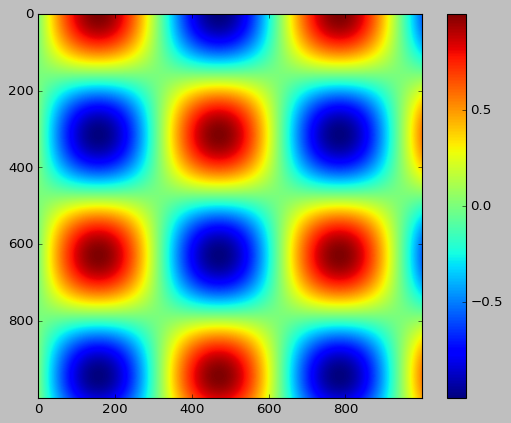

In [19]:
x = np.linspace(0,10,1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

In [20]:
4 * np.linspace(0,2,10).reshape(-1,1)

array([[0.        ],
       [0.88888889],
       [1.77777778],
       [2.66666667],
       [3.55555556],
       [4.44444444],
       [5.33333333],
       [6.22222222],
       [7.11111111],
       [8.        ]])

In [21]:
#np.linspace(0,2,10) * np.linspace(0,2,10).reshape(-1,1)

We'll now discuss a few ideas for customizing these colorbars and using them effectively in various situations.

## Customizing Colorbars

The colormap can be specified using the ``cmap`` argument to the plotting function that is creating the visualization:

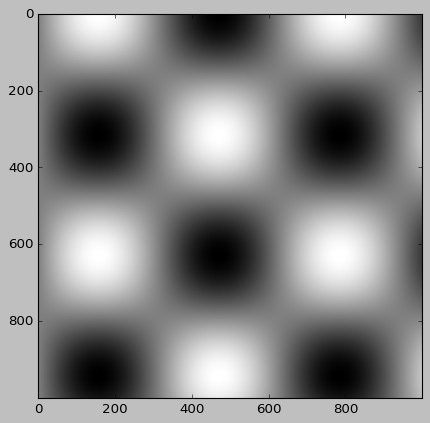

In [22]:
plt.imshow(I, cmap = 'gray')

All the available colormaps are in the ``plt.cm`` namespace; using IPython's tab-completion will give you a full list of built-in possibilities:
```
plt.cm.<TAB>
```
But being *able* to choose a colormap is just the first step: more important is how to *decide* among the possibilities!
The choice turns out to be much more subtle than you might initially expect.

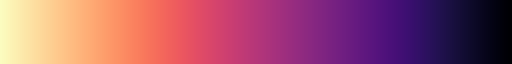

In [23]:
plt.cm.magma_r

### Choosing the Colormap

A full treatment of color choice within visualization is beyond the scope of this book, but for entertaining reading on this subject and others, see the article ["Ten Simple Rules for Better Figures"](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833).
Matplotlib's online documentation also has an [interesting discussion](http://Matplotlib.org/1.4.1/users/colormaps.html) of colormap choice.

Broadly, you should be aware of three different categories of colormaps:

- ***Sequential colormaps***: These are made up of one continuous sequence of colors (e.g., ``binary`` or ``viridis``).
- ***Divergent colormaps***: These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., ``RdBu`` or ``PuOr``).
- ***Qualitative colormaps***: these mix colors with no particular sequence (e.g., ``rainbow`` or ``jet``).

The ``jet`` colormap, which was the default in Matplotlib prior to version 2.0, is an example of a qualitative colormap.
Its status as the default was quite unfortunate, because qualitative maps are often a poor choice for representing quantitative data.
Among the problems is the fact that qualitative maps usually do not display any uniform progression in brightness as the scale increases.

We can see this by converting the ``jet`` colorbar into black and white:

In [24]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
        
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)
    

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

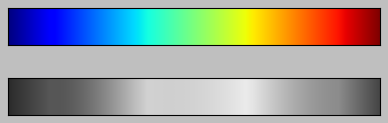

In [25]:
view_colormap('jet')

Notice the bright stripes in the grayscale image.
Even in full color, this uneven brightness means that the eye will be drawn to certain portions of the color range, which will potentially emphasize unimportant parts of the dataset.
It's better to use a colormap such as ``viridis`` (the default as of Matplotlib 2.0), which is specifically constructed to have an even brightness variation across the range.
Thus it not only plays well with our color perception, but also will translate well to grayscale printing:

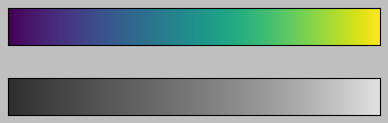

In [26]:
view_colormap('viridis')

If you favor rainbow schemes, another good option for continuous data is the ``cubehelix`` colormap:

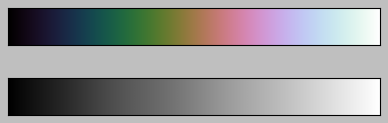

In [27]:
view_colormap('cubehelix')

For other situations, such as showing positive and negative deviations from some mean, dual-color colorbars such as ``RdBu`` (*Red-Blue*) can be useful. However, as you can see in the following figure, it's important to note that the positive-negative information will be lost upon translation to grayscale!

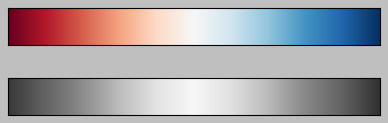

In [28]:
view_colormap('RdBu')

We'll see examples of using some of these color maps as we continue.

There are a large number of colormaps available in Matplotlib; to see a list of them, you can use IPython to explore the ``plt.cm`` submodule. For a more principled approach to colors in Python, you can refer to the tools and documentation within the Seaborn library (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)).

### Color limits and extensions

Matplotlib allows for a large range of colorbar customization.
**The colorbar itself is simply an instance of ``plt.Axes``, so all of the axes and tick formatting tricks we've learned are applicable.**
The colorbar has some interesting flexibility: for example, we can narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the ``extend`` property.
This might come in handy, for example, if displaying an image that is subject to noise:

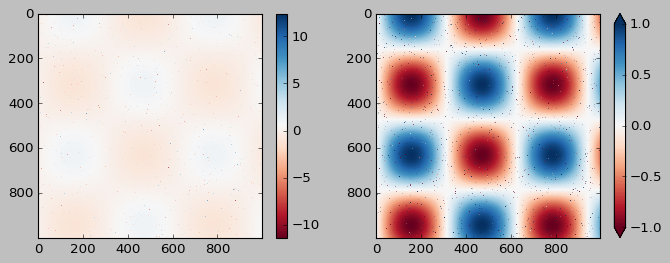

In [29]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles)) # contamos los True

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both') # Triangular shape in color bar
plt.clim(-1, 1); # Fix the color edges para verlos

In [30]:
type(I)

numpy.ndarray

Notice that in the left panel, the default color limits respond to the noisy pixels, and the range of the noise completely washes-out the pattern we are interested in.
In the right panel, we manually set the color limits, and add extensions to indicate values which are above or below those limits.
The result is a much more useful visualization of our data.

### Discrete Color Bars

Colormaps are by default continuous, but sometimes you'd like to represent discrete values.
The easiest way to do this is to use the ``plt.cm.get_cmap()`` function, and pass the name of a suitable colormap along with the number of desired bins:

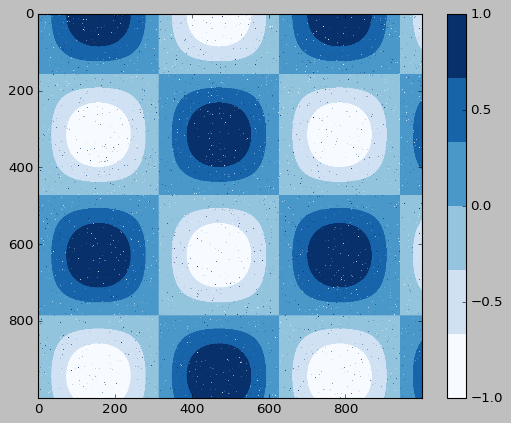

In [31]:
plt.imshow(I, cmap=plt.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1,1)

The discrete version of a colormap can be used just like any other colormap.

## Example: Handwritten Digits

For an example of where this might be useful, let's look at an interesting visualization of some hand written digits data.
This data is included in Scikit-Learn, and consists of nearly 2,000 $8 \times 8$ thumbnails showing various hand-written digits.

For now, let's start by downloading the digits data and visualizing several of the example images with ``plt.imshow()``:

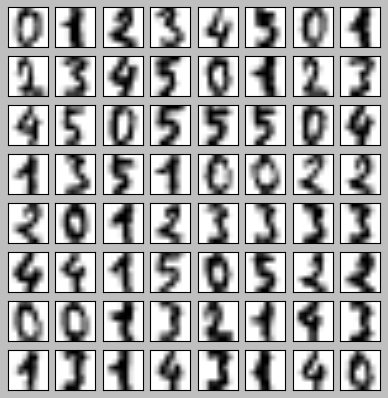

In [32]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [33]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [34]:
len(digits.images)

1083

Because each digit is defined by the hue of its 64 pixels, we can consider each digit to be a point lying in 64-dimensional space: each dimension represents the brightness of one pixel.
But visualizing relationships in such high-dimensional spaces can be extremely difficult.
One way to approach this is to use a *dimensionality reduction* technique such as manifold learning to reduce the dimensionality of the data while maintaining the relationships of interest.
Dimensionality reduction is an example of unsupervised machine learning, and we will discuss it in more detail in [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb).

Deferring the discussion of these details, let's take a look at a two-dimensional manifold learning projection of this digits data (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb) for details):

In [35]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:155: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


We'll use our discrete colormap to view the results, setting the ``ticks`` and ``clim`` to improve the aesthetics of the resulting colorbar:

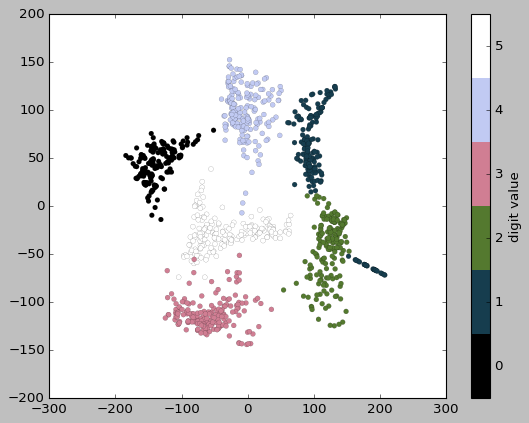

In [37]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,
            c=digits.target, cmap=plt.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

The projection also gives us some interesting insights on the relationships within the dataset: for example, the ranges of 5 and 3 nearly overlap in this projection, indicating that some hand written fives and threes are difficult to distinguish, and therefore more likely to be confused by an automated classification algorithm.
Other values, like 0 and 1, are more distantly separated, and therefore much less likely to be confused.
This observation agrees with our intuition, because 5 and 3 look much more similar than do 0 and 1.

